#### Question 3 (3 points)

a. Use the synthetic dataset (created below) to train a logistic regression model on the training set. Calculate the AUC of your prediction on the test set.

In [9]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
plt.style.use("seaborn")
from random import sample
import random
import numpy as np

In [6]:
X, y = datasets.make_classification(n_samples=2000, n_features=20,
                                    n_informative=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [8]:
lr = LogisticRegression(random_state=0, solver='lbfgs', max_iter=10000).fit(X_train, y_train) 
y_pred = lr.predict(X_test)
y_score = lr.decision_function(X_test)

roc_auc_score(y_test, y_score)

0.8574146059052188

b. Randomly sample 100, 300, and 1000 data points from the training set. For each sample size, randomly sample 1000 times, each time fit a logistic regresson, predict on the test set and calcuate the AUC. Plot a distribution of the 1000 AUCs for each sample size on the same plot. Also, plot the AUC you get from 3a as a verticle line on the same plot as well. (Hints: Plot [distributions/histogram](https://stackoverflow.com/questions/6871201/plot-two-histograms-on-single-chart-with-matplotlib).) 

Mean for sample size 100:
0.8151545594059861
Mean for sample size 300:
0.8458251500197576
Mean for sample size 1000:
0.8563551126182009


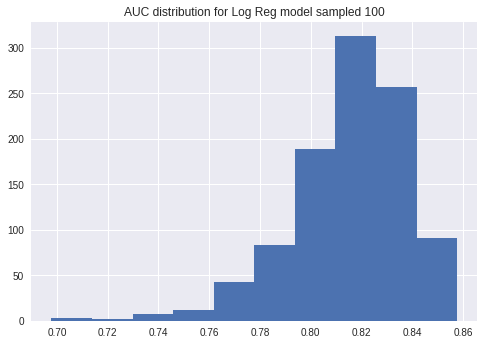

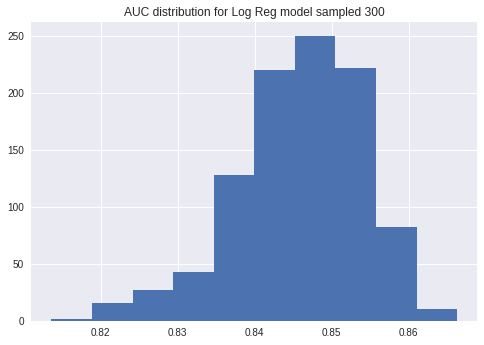

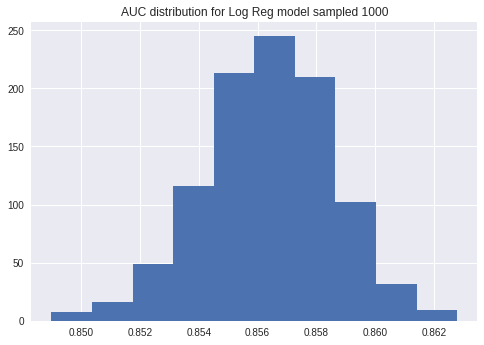

In [34]:
sample_sizes = [100, 300, 1000]
runs = 1000

for sample_size in sample_sizes:
    AUCs = []
    for rs in range(runs):
        X_train_subset, y_train_subset = zip(*random.sample(list(zip(X_train, y_train)), sample_size))
        lr = LogisticRegression().fit(X_train_subset, y_train_subset)
        y_pred = lr.predict(X_test)
        y_score = lr.decision_function(X_test)
        auc = roc_auc_score(y_test, y_score)
        AUCs.append(auc)
    plt.figure()
    plt.hist(AUCs)
    plt.title("AUC distribution for Log Reg model sampled " + str(sample_size))
    print("Mean for sample size " + str(sample_size) + ":")
    print(np.mean(AUCs))


c. What pattern did you see from the plot you get from 3b? Explain your findings.

The distribution of AUCs seems to be reducing its kurtosis and moving to the right as we go from 100 to 1000 sample subsets, meaning there may be less variance in the AUC measurements but they seem to be overall higher on average, which is confirmed by printing out the means for each sample size.

Ultimately this may just mean that having more data gives us a better model, since an AUC closer to 1 means that we have a model with higher TPR and lower FPR, thus giving it an overall better performance by most measurements. The higher the number of data points, the higher the AUC in this case. 